In [1]:
library(dplyr)
library(ggplot2)
library(repr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
data <- read.csv("../../terrorism.csv")
group_names <- read.csv("final_names.csv")

In [3]:
# Size of the plots
options(repr.plot.width=10, repr.plot.height=5)

#### We're interested in the data that has information regarding the individuals:

In [4]:
data <- data[data$gname != "Unknown" & data$gname != "Other" & data$gname != "Unaffiliated Individual(s)",]

# 1. Who are they? Where are they from? Do they act in groups? Are they working alone?

## 1.1. Top 15 most active groups

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

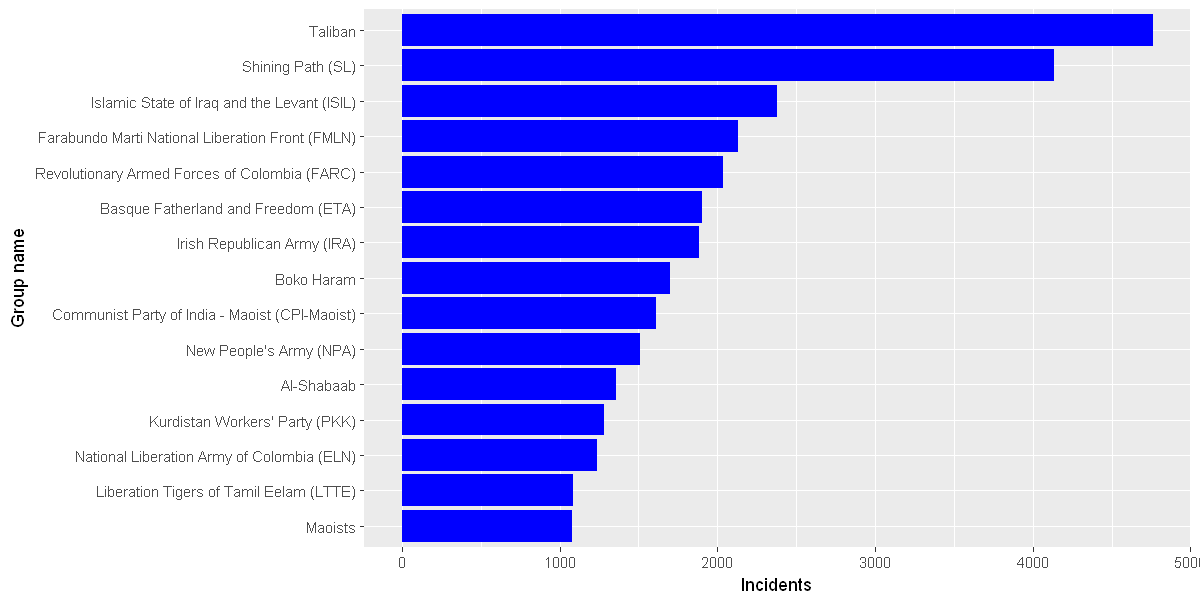

In [5]:
data1 <- data %>% group_by(gname) %>% summarise(number_incidents = n()) %>% 
  arrange(desc(number_incidents)) %>% head(15)

ggplot(data1, aes(x = reorder(gname, number_incidents), y = number_incidents)) +
  geom_histogram(stat="identity", fill = "blue") +
  coord_flip() + 
  xlab("Group name") +
  ylab("Incidents")

## 1.2. Regions in which the terrorists attack

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

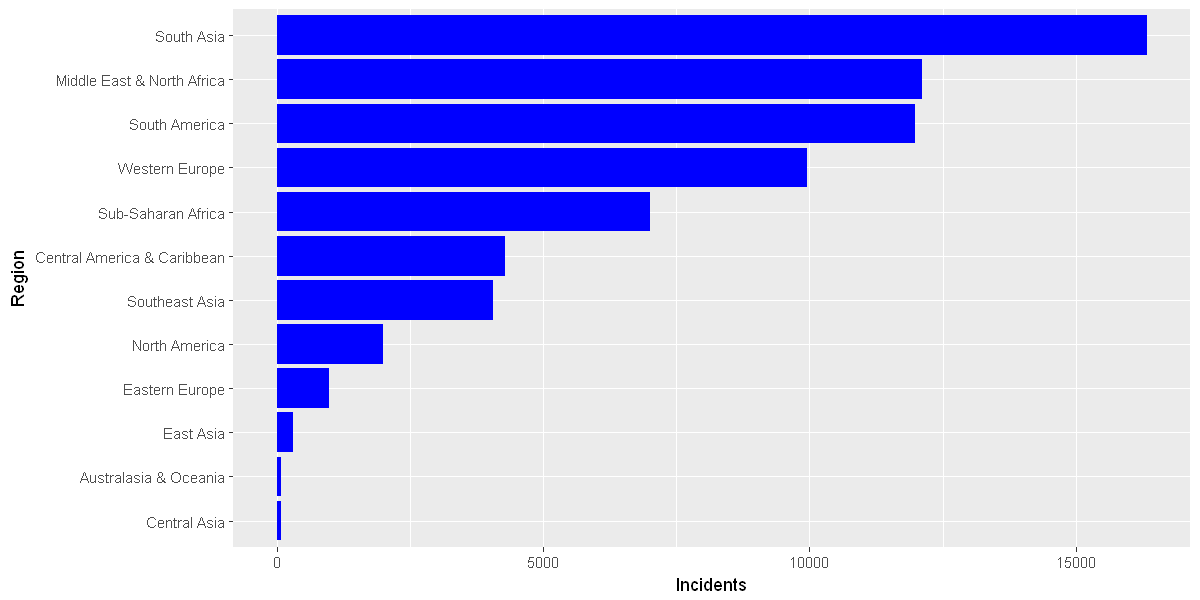

In [6]:
data1 <- data %>% group_by(region_txt) %>% summarise(number_incidents = n()) %>% 
  arrange(desc(number_incidents)) %>% head(15)

ggplot(data1, aes(x = reorder(region_txt, number_incidents), y = number_incidents)) +
  geom_histogram(stat="identity", fill = "blue") +
  coord_flip() + 
  xlab("Region") +
  ylab("Incidents")

## 1.3. Countries in which the terrorists attack

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

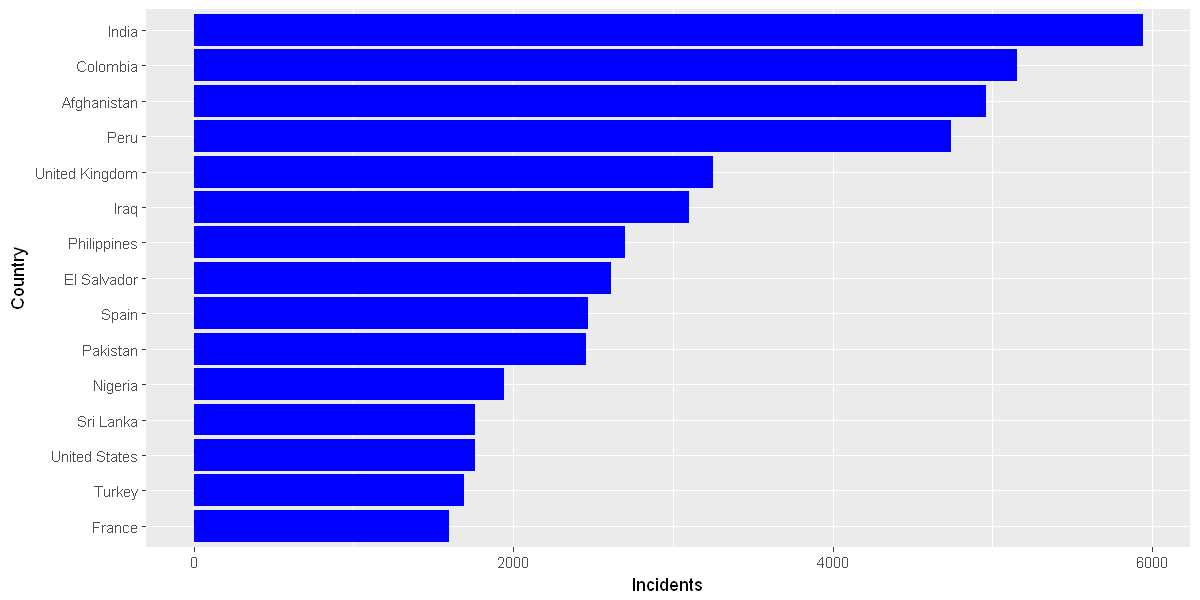

In [7]:
data1 <- data %>% group_by(country_txt) %>% summarise(number_incidents = n()) %>% 
  arrange(desc(number_incidents)) %>% head(15)

ggplot(data1, aes(x = reorder(country_txt, number_incidents), y = number_incidents)) +
  geom_histogram(stat="identity", fill = "blue") +
  coord_flip() + 
  xlab("Country") +
  ylab("Incidents")

## 1.4. Median number of perps in regions

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

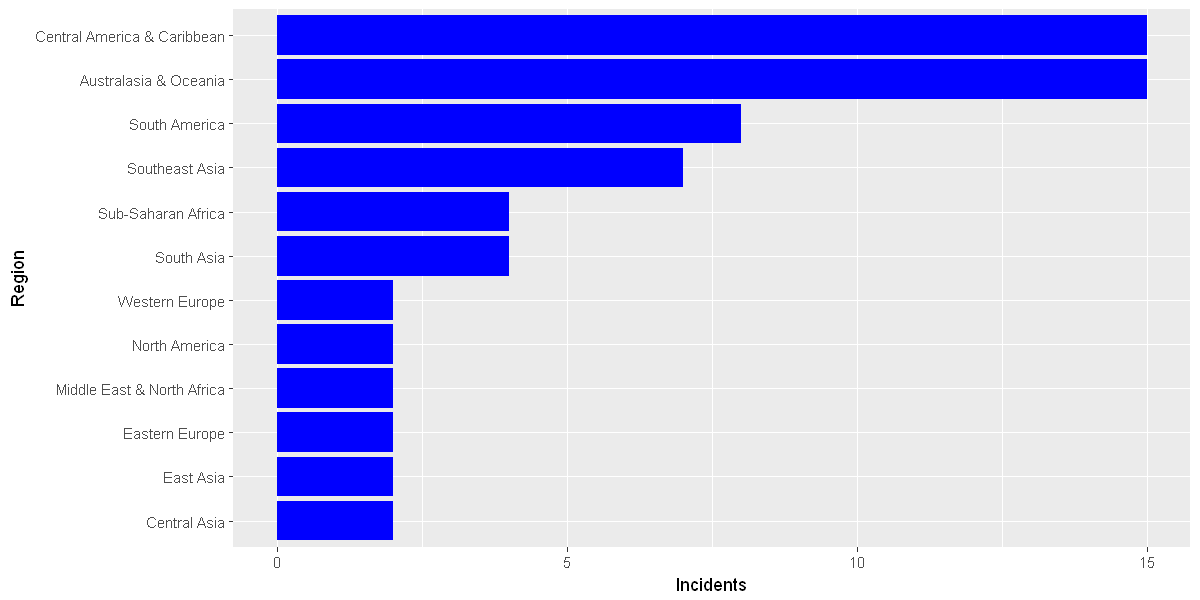

In [8]:
data1 <- data %>% filter(nperps != "Unknown" & nperps != "-99") %>% group_by(region_txt) %>%
  summarise(n_perps = median(nperps, na.rm = TRUE)) %>% 
  arrange(desc(n_perps)) %>% head(15)

ggplot(data1, aes(x = reorder(region_txt, n_perps), y = n_perps)) +
  geom_histogram(stat="identity", fill = "blue") +
  coord_flip() + 
  xlab("Region") +
  ylab("Incidents")

## 1.5. Median number of perps in countries

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

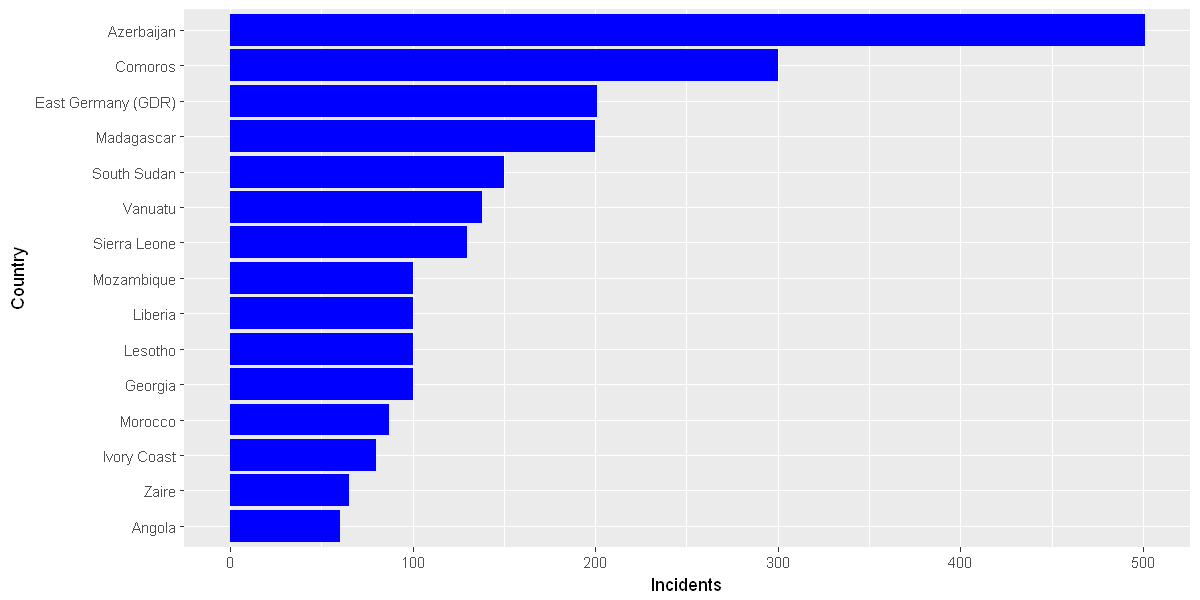

In [9]:
data1 <- data %>% filter(nperps != "Unknown" & nperps != "-99") %>% group_by(country_txt) %>%
  summarise(n_perps = median(nperps, na.rm = TRUE)) %>% 
  arrange(desc(n_perps)) %>% head(15)

ggplot(data1, aes(x = reorder(country_txt, n_perps), y = n_perps)) +
  geom_histogram(stat="identity", fill = "blue") +
  coord_flip() + 
  xlab("Country") +
  ylab("Incidents")

# 2. Which motivations do they have? --- (does the motivation depends on the terrorist group?)

Create a new categorical feature called "motivation", based on the motive's text field?

# 3. How is the motive changing?

# 4. Which kind of attack do they use? --- (does the type of attack depends on the group and/or on the motivation?)

For this analysis (and the next ones), we decided to analyze the top 15 groups with more attacks

In [10]:
best_groups <- data %>% group_by(gname) %>% summarise(number_incidents = n()) %>% 
  arrange(desc(number_incidents)) %>% head(15)

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

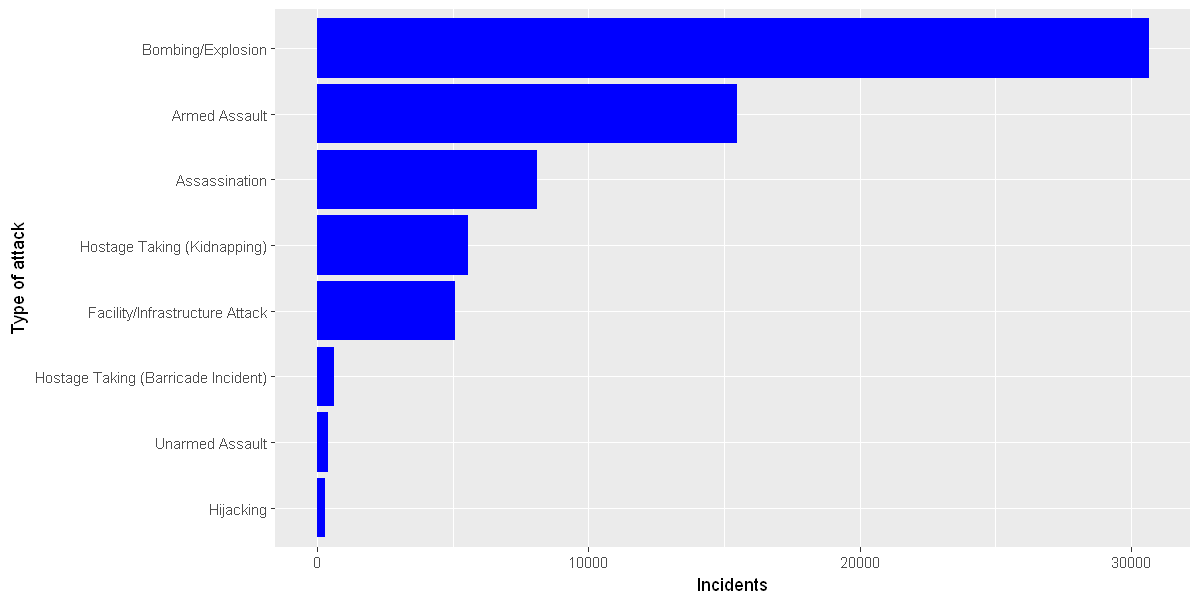

In [11]:
data1 <- data %>% filter(attacktype1_txt != "Unknown") %>%
  group_by(attacktype1_txt) %>%
  summarise(count = n())

ggplot(data1, aes(x = reorder(attacktype1_txt, count), y = count)) +
  geom_histogram(stat="identity", fill = "blue") +
  coord_flip() + 
  xlab("Type of attack") +
  ylab("Incidents")

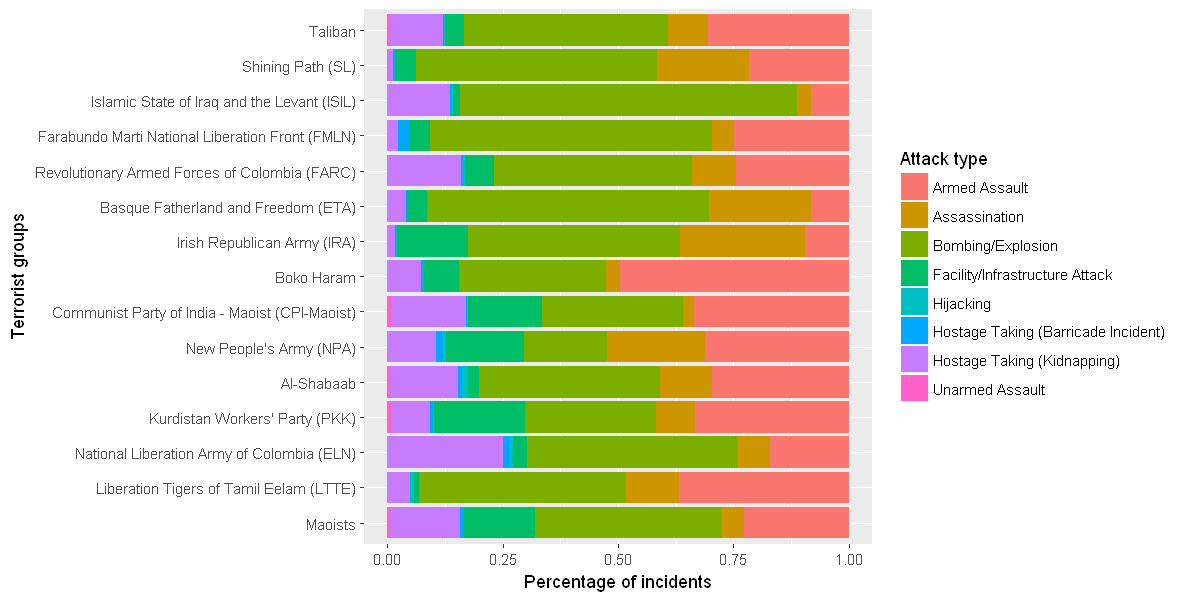

In [12]:
data1 <- data %>% filter(gname %in% best_groups$gname & attacktype1_txt != "Unknown")

ggplot(data1, aes(x = factor(gname, levels = rev(best_groups$gname)), fill = attacktype1_txt)) +
  geom_bar(position = "fill") +
  scale_fill_discrete(name = "Attack type") +
  coord_flip() +
  xlab("Terrorist groups") +
  ylab("Percentage of incidents")

# 5. Which kind of weapons do they use? --- (does the type of weapon depends on the group and/or on the type of attack?)

In [13]:
levels(data$weaptype1_txt)[levels(data$weaptype1_txt)=="Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"] <- "Vehicle"

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

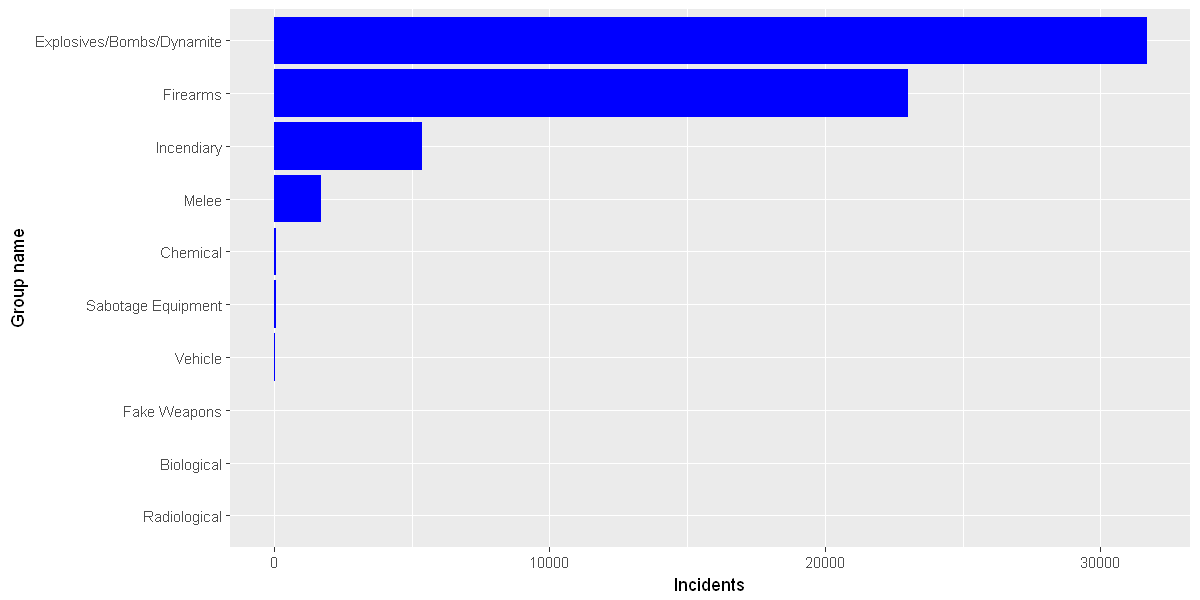

In [14]:
data1 <- data %>% filter(weaptype1_txt != "Other" & weaptype1_txt != "Unknown") %>%
  group_by(weaptype1_txt) %>% summarise(count = n()) %>% arrange(desc(count))

ggplot(data1, aes(x = reorder(weaptype1_txt, count), y = count)) +
  geom_histogram(stat="identity", fill = "blue") +
  coord_flip() + 
  xlab("Type of attack") +
  ylab("Incidents")

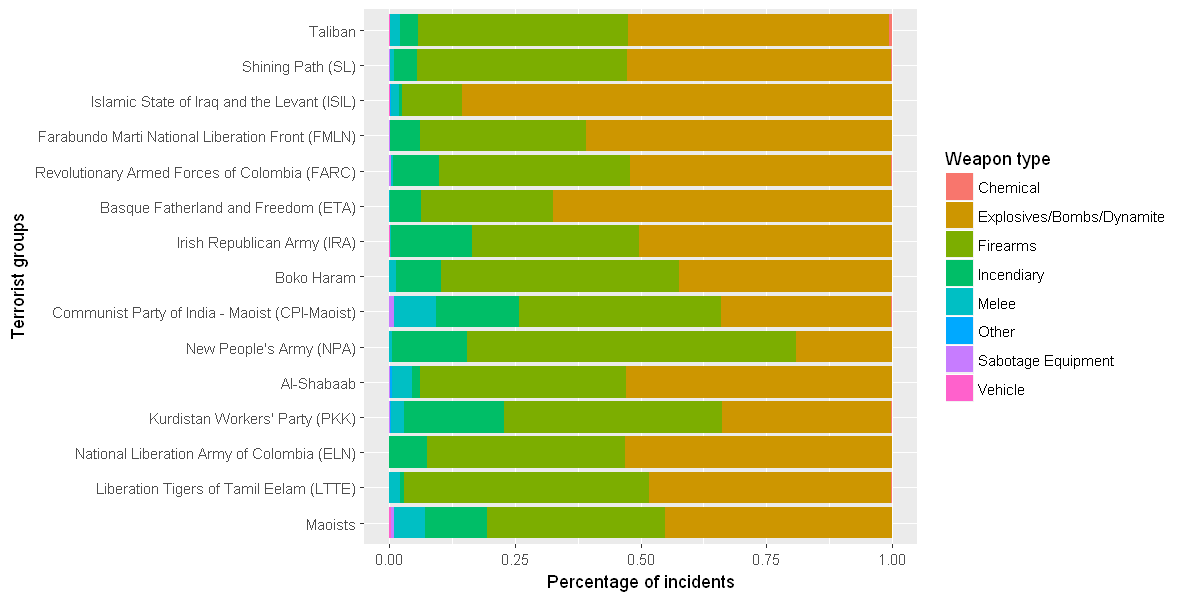

In [15]:
data1 <- data %>% filter(gname %in% best_groups$gname & weaptype1_txt != "Unknown")

ggplot(data1, aes(x = factor(gname, levels = rev(best_groups$gname)), fill = weaptype1_txt)) +
  geom_bar(position = "fill") +
  scale_fill_discrete(name = "Weapon type") +
  coord_flip() +
  xlab("Terrorist groups") +
  ylab("Percentage of incidents")

# 6. Do they commit suicide? --- (does commiting suicide depends on the type of attack or/and group or/and motivation?)

# 7. How many terrorists die in an attack? Are they captured? Does this depends on the region?

# 8. Are there terrorist groups more successful in theirs attack? --- (attribute Successful Attack)